In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", None)

def get_project_root() -> Path:
    current = Path(__file__).resolve() if "__file__" in globals() else Path().resolve()

    for parent in [current] + list(current.parents):
        if (parent / ".git").exists():
            return parent

    raise RuntimeError("Project root not found. Ensure you're inside a Git project.")

# ---- Core paths ----
PROJECT_ROOT = get_project_root()

DATA_PATH = PROJECT_ROOT / "data" / "raw"
OUTPUT_DIR = PROJECT_ROOT / "artifacts" / "figures"

# Ensure output directory exists
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
df = pd.read_csv(f"{DATA_PATH}/Crimes_-_2001_to_Present_20260216.csv")
df.shape

(8495400, 22)

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14103839,JK140990,02/07/2026 12:00:00 AM,001XX N WESTERN AVE,3960,INTIMIDATION,INTIMIDATION,GAS STATION,False,True,1223,12.0,27.0,28.0,08A,1160392.0,1900695.0,2026,02/14/2026 03:41:20 PM,41.883209,-87.686489,"(41.883208624, -87.686489297)"
1,14106862,JK144803,02/07/2026 12:00:00 AM,062XX S WOOD ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,714,7.0,15.0,67.0,06,1165419.0,1863340.0,2026,02/14/2026 03:41:20 PM,41.780597,-87.669091,"(41.780597165, -87.669090541)"
2,14103919,JK141175,02/07/2026 12:00:00 AM,047XX W FULTON ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1113,11.0,28.0,25.0,14,1144769.0,1901372.0,2026,02/14/2026 03:41:20 PM,41.885375,-87.743841,"(41.885375199, -87.743841292)"
3,14104038,JK141314,02/07/2026 12:00:00 AM,015XX W POLK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1231,12.0,28.0,28.0,07,1166326.0,1896529.0,2026,02/14/2026 03:41:20 PM,41.871652,-87.664819,"(41.871651985, -87.664818507)"
4,14104578,JK141890,02/07/2026 12:00:00 AM,0000X S STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,112,1.0,34.0,32.0,06,1176389.0,1900278.0,2026,02/14/2026 03:41:20 PM,41.881718,-87.627760,"(41.88171846, -87.627760426)"


In [18]:
list(df.columns)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495400 entries, 0 to 8495399
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [20]:
missing = df.isna().sum().sort_values(ascending=False)
missing_ratio = (missing / len(df)).sort_values(ascending=False)

pd.DataFrame({
    "missing_count": missing,
    "missing_ratio": missing_ratio
}).head(20)

,missing_count,missing_ratio
Ward,614818,0.072371
Community Area,613685,0.072237
Location,94616,0.011137
Y Coordinate,94616,0.011137
Longitude,94616,0.011137
Latitude,94616,0.011137
X Coordinate,94616,0.011137
Location Description,15583,0.001834
District,47,0.000006
IUCR,0,0.000000


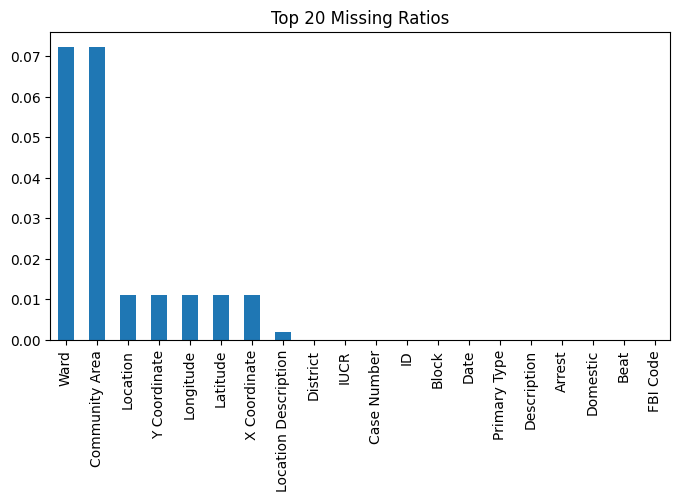

In [21]:
plt.figure(figsize=(8,4))
missing_ratio.head(20).plot(kind="bar")
plt.title("Top 20 Missing Ratios")

# Add this line to save the figure
plt.savefig(f"{OUTPUT_DIR}/missing_ratios.png", bbox_inches="tight", dpi=300)

plt.show()

In [22]:
# check for duplicate values in a specific column(ID)
df.duplicated(subset=['ID']).sum()

np.int64(0)

In [23]:
df['Date'].map(type).unique()

array([<class 'str'>], dtype=object)

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [27]:
print("Start:", df["Date"].min())
print("End:", df["Date"].max())
print("Years:", df["Date"].dt.year.nunique()) # type: ignore

Start: 2001-01-01 00:00:00
End: 2026-02-07 00:00:00
Years: 26


In [28]:
df["Primary Type"].value_counts().head(15)

Primary Type
THEFT                         1804496
BATTERY                       1547477
CRIMINAL DAMAGE                965865
NARCOTICS                      765856
ASSAULT                        570512
OTHER OFFENSE                  530287
BURGLARY                       448744
MOTOR VEHICLE THEFT            436402
DECEPTIVE PRACTICE             392960
ROBBERY                        316106
CRIMINAL TRESPASS              228410
WEAPONS VIOLATION              126236
PROSTITUTION                    70467
OFFENSE INVOLVING CHILDREN      60988
PUBLIC PEACE VIOLATION          55084
Name: count, dtype: int64

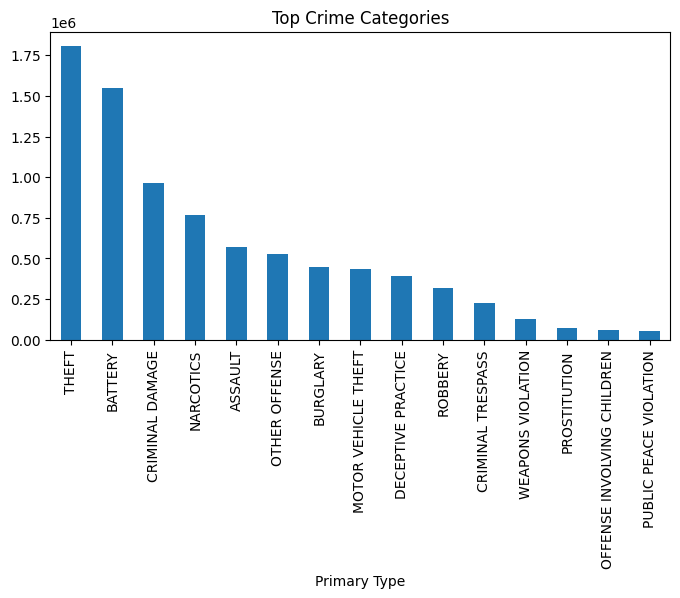

In [29]:
plt.figure(figsize=(8,4))
df["Primary Type"].value_counts().head(15).plot(kind="bar")
plt.title("Top Crime Categories")

# Add this line to save the plot
plt.savefig(f"{OUTPUT_DIR}/crime_categories.png", bbox_inches='tight', dpi=300)

plt.show()


In [30]:
df["Arrest"].mean()

np.float64(0.25150634461002425)

In [31]:
df["Domestic"].mean()

np.float64(0.17277338324269606)